In [31]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
#Let's load our Diagnosis dataset that we will be working with on this project
data = pd.read_csv("breast_cancer_data.csv")

In [33]:
#Let's have a view of what our dataset looks like
pp.ProfileReport(data)

Number of variables,6
Number of observations,569
Total Missing (%),0.0%
Total size in memory,26.8 KiB
Average record size in memory,48.1 B
Numeric,3
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001775FD8C518>,
      dtype=object)

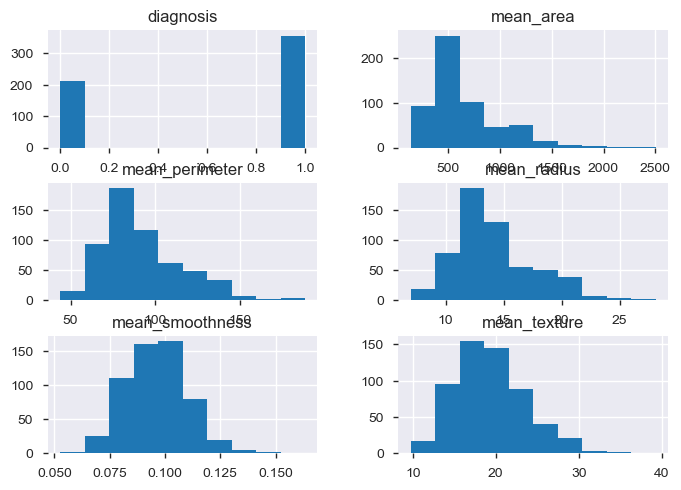

In [34]:
#Let's bring out the histograms of our Data profiles for clearer view
data.hist()

From the above histogram, Diagnosis with labels 1 has more frequencies than Diagnosis with 0 labels. Also note that our target variable is the Diagnosis. From our pandas profiling, we realised that two of our features were strongly correlated. This may have strong effect on our prediction. Therefore, we would be checking Correlation of these features with our Target variable.

In [35]:
data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


The Target variable ***diagnosis*** has direct negative correlation with all available explanatory variables.

Text(0.5, 1.0, 'Correlation Matrix of Cancer Diagnosis')

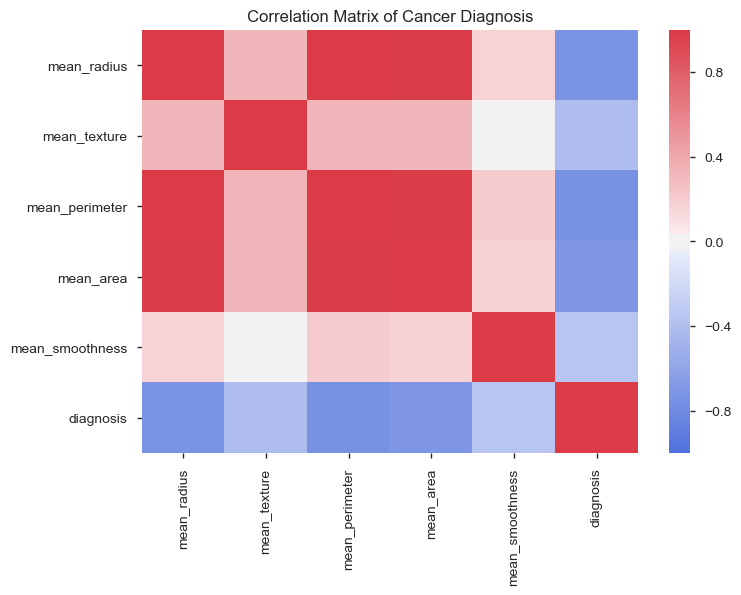

In [36]:
corr_map = sns.diverging_palette(260, 10, as_cmap=True)
ax = sns.heatmap(data.corr(),vmin=-1,vmax=1, cmap=corr_map)
ax.set_title("Correlation Matrix of Cancer Diagnosis",fontsize=12)

# Let us now plot out the pairplot of different features to determine which features are better at classifying the 2 classes of our problem.

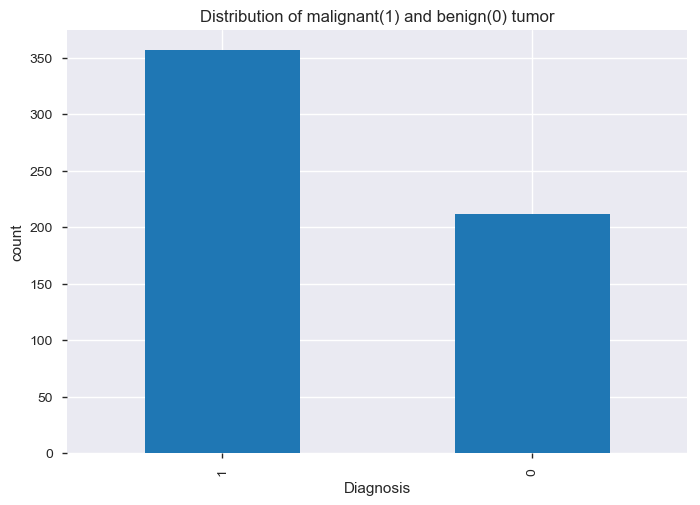

In [37]:
count = data.diagnosis.value_counts()
count.plot(kind='bar')
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count");

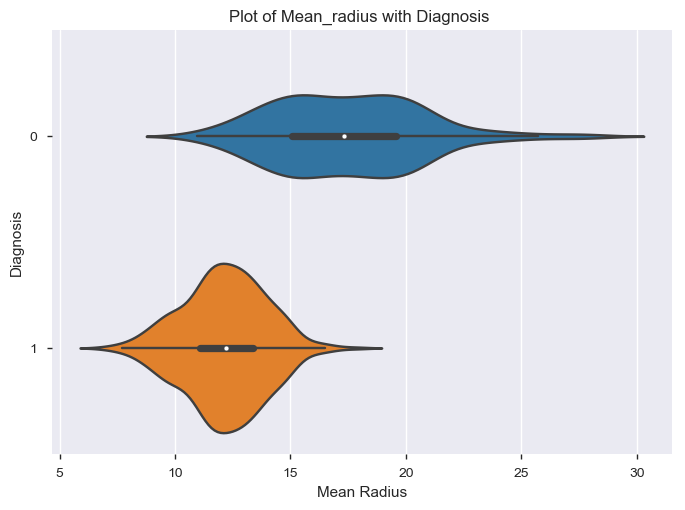

In [38]:
sns.violinplot(data.mean_radius,data.diagnosis, orient='h')
plt.title("Plot of Mean_radius with Diagnosis ")
plt.xlabel("Mean Radius")
plt.ylabel("Diagnosis");

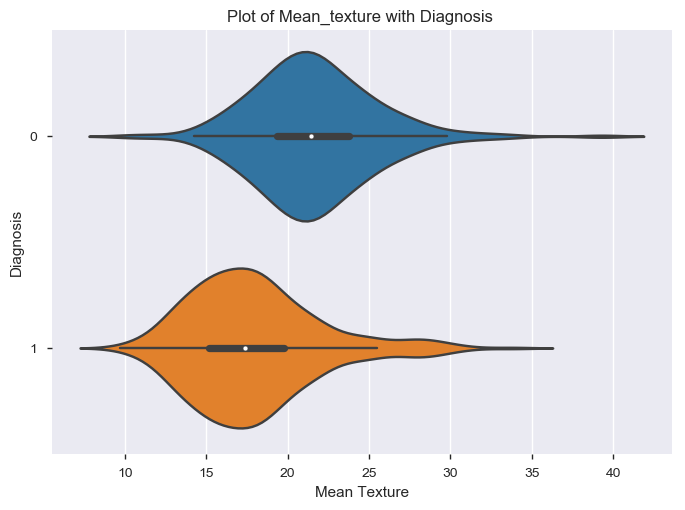

In [39]:
sns.violinplot(data.mean_texture,data.diagnosis, orient='h')
plt.title("Plot of Mean_texture with Diagnosis ")
plt.xlabel("Mean Texture")
plt.ylabel("Diagnosis");

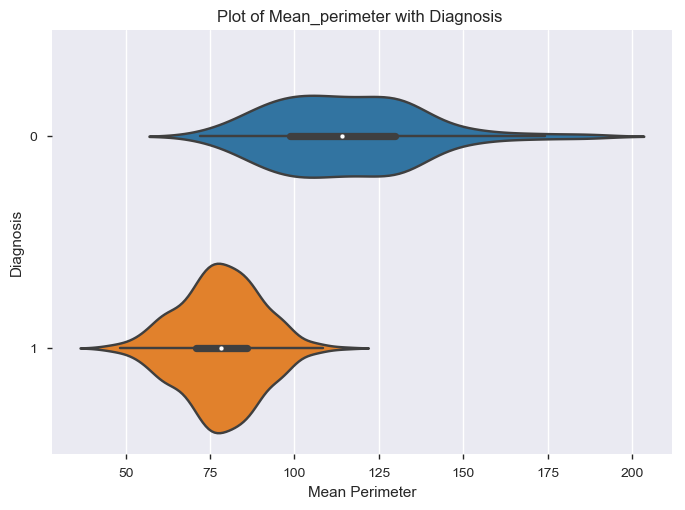

In [40]:
sns.violinplot(data.mean_perimeter,data.diagnosis, orient='h')
plt.title("Plot of Mean_perimeter with Diagnosis ")
plt.xlabel("Mean Perimeter")
plt.ylabel("Diagnosis");

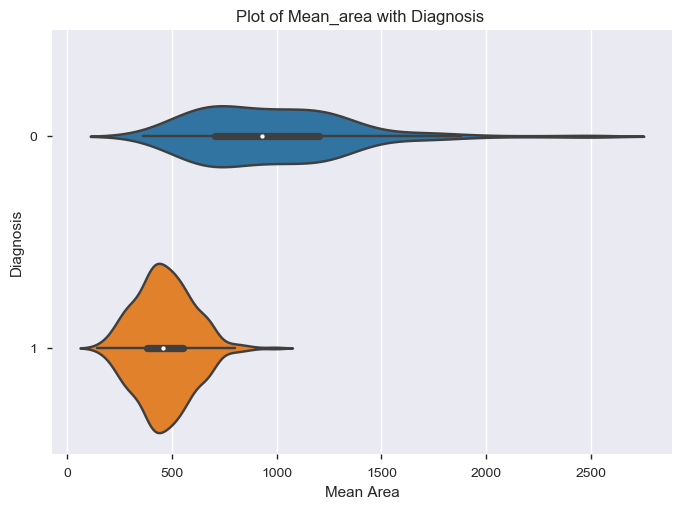

In [41]:
sns.violinplot(data.mean_area,data.diagnosis, orient='h')
plt.title("Plot of Mean_area with Diagnosis ")
plt.xlabel("Mean Area")
plt.ylabel("Diagnosis");

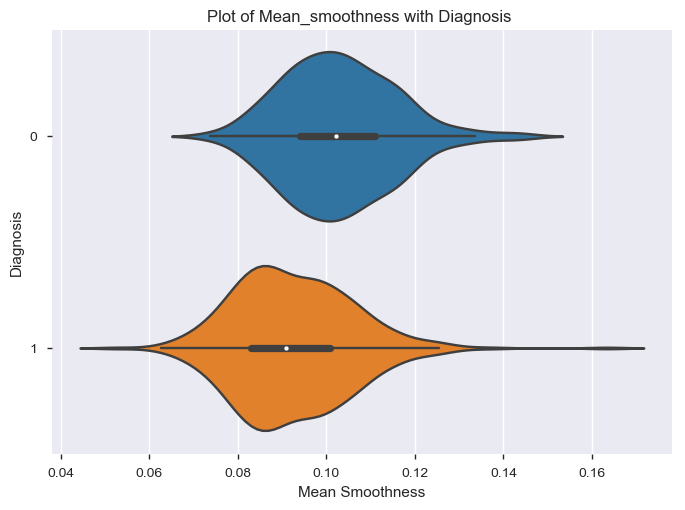

In [42]:
sns.violinplot(data.mean_smoothness,data.diagnosis, orient='h')
plt.title("Plot of Mean_smoothness with Diagnosis ")
plt.xlabel("Mean Smoothness")
plt.ylabel("Diagnosis");

# How well can you keep secret?
We are going to hide our labelled variable from our model. It's our top secret to getting the best out of our model

In [43]:
X = data.drop(['diagnosis'], axis=1)
y = data.diagnosis

# Splitting our Dataset 70%Training set and 30% Test set

In [44]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=2)

In [45]:
# Initialize our classifier
gnb = GaussianNB()
# Train our classifier
model_a = gnb.fit(train_X, train_y)

In [46]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
model_b = lgr.fit(train_X, train_y)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
y_pred = model_a.predict(test_X)

In [48]:
acc = accuracy_score(test_y, y_pred)
print("Accuracy score using Guassian Naives Bayes:", acc*100)

Accuracy score using Guassian Naives Bayes: 90.05847953216374


In [49]:
preds = model_b.predict(test_X)

In [50]:
acc2 = accuracy_score(test_y, preds)
print("Accuracy score using Logistic Regression:", acc2*100)

Accuracy score using Logistic Regression: 91.22807017543859


In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
conf_mat = confusion_matrix(test_y, y_pred)
conf_mat

array([[55, 12],
       [ 5, 99]], dtype=int64)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
model_c = knn.fit(train_X, train_y)

In [56]:
preds2 = model_c.predict(test_X)

In [57]:
acc3 = accuracy_score(test_y, preds2)
print("Accuracy score using KNearest Neighbour:", acc3*100)

Accuracy score using KNearest Neighbour: 85.96491228070175


In [58]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
Acc_score = accuracy_score(predictions, test_y)
print("Accuracy score using AdaBoost Classifier:", Acc_score*100)

Accuracy score using AdaBoost Classifier: 94.73684210526315


In [59]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def show_confusion_matrix(test_y, predictions):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(test_y, predictions)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    class_names = list(np.unique(predictions))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

Confusion matrix, without normalization
[[ 62   5]
 [  4 100]]
Normalized confusion matrix
[[0.93 0.07]
 [0.04 0.96]]


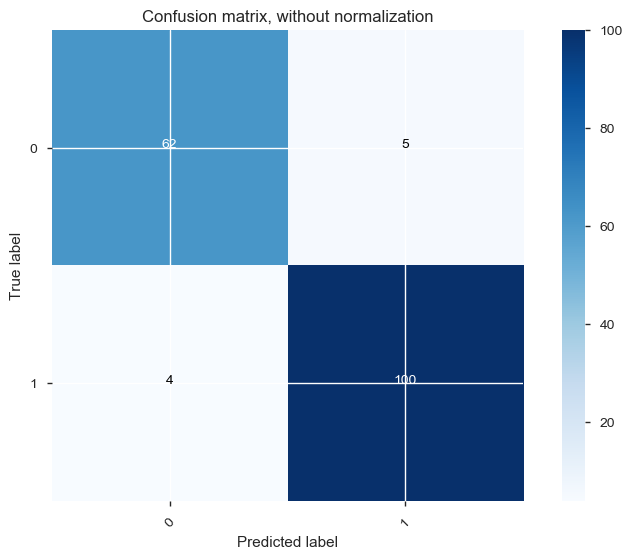

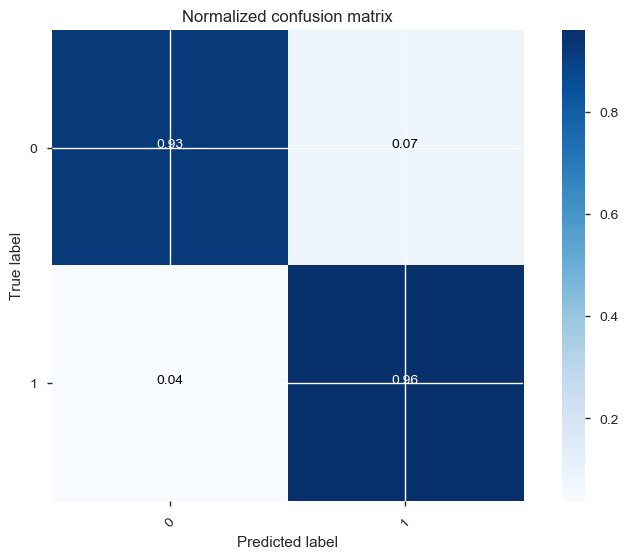

In [60]:
show_confusion_matrix(test_y, predictions)

We wiil settle for **AdaBoost Classifier** being the highest perfoming Model so far with 94.7% Accuracy. 

# Kindly give a Star and watch out for more from me